In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [40]:
train.tail()

,Dias,Confirmados,Óbitos,Novos por Dia,Óbitos por dia,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia,Óbitos/Dia
98,24/06,17080,546.0,853,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,25/06,18023,574.0,943,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,26/06,18665,592.0,642,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,27/06,19158,615.0,493,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,28/06,19753,643.0,595,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
test.tail()

,Dias,Confirmados,Óbitos,Novos por Dia,Óbitos por dia,Semana,Conf/Semana,Obt/Semana,Novos/Semana,Unnamed: 9,Novos/Dia,Óbitos/Dia
106,02/07,24376,726.0,1069,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,03/07,25561,762.0,1185,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,04/07,26079,784.0,518,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,05/07,26511,809.0,432,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,06/07,27514,834.0,1003,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
test_y = test['Confirmados'][len(train):].values.ravel()

In [43]:
test_x = test['Confirmados'][len(train):].index.ravel()

In [44]:
test_y.shape,test_x.shape

((8,), (8,))

In [45]:
test_y = test_y.reshape(-1,1)
test_x = test_x.reshape(-1,1)
test_y.shape,test_x.shape

((8, 1), (8, 1))

In [46]:
test_y.max(),test_x.max()

(27514, 110)

In [47]:
test_y.min(),test_x.min()

(20422, 103)

In [48]:
train_y = train['Confirmados'].values.ravel()

In [49]:
train_x = train['Confirmados'].index.ravel()

In [50]:
train_y.shape,train_x.shape

((103,), (103,))

In [51]:
train_y = train_y.reshape(-1,1)
train_x = train_x.reshape(-1,1)
train_y.shape,train_x.shape

((103, 1), (103, 1))

In [52]:
train_y.max(),train_x.max()

(19753, 102)

In [53]:
train_y.min(),train_x.min()

(0, 0)

In [54]:
degree = 5

modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(train_x, train_y)

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.19287e-21): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [55]:
pred_values = modelo_polinomial.predict(test_x)

In [56]:
pred = np.int_(pred_values)

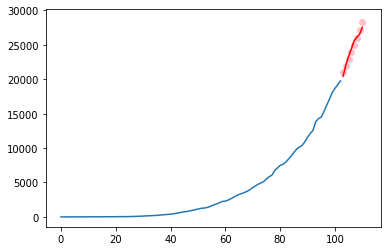

In [58]:
plt.plot(train_x,train_y)
plt.plot(test_x,test_y,color='red')
plt.scatter(test_x,pred,color='pink')
plt.show()